In [394]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

In [245]:
df = pd.read_csv("netflix_titles.csv")

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [82]:
df.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

(0.0, 3300.0)

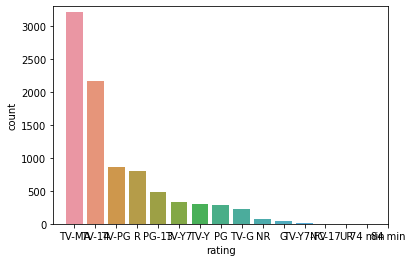

In [83]:
fig, ax = plt.subplots()
sns.countplot(x=df.rating, order=df.rating.value_counts().index)
ax.set_xlim(-1,15)
ax.set_ylim(0,3300)

In [246]:
fq = df['rating'].value_counts(normalize=True)
mapping = df['rating'].map(fq)
df["rating_new"] = df['rating'].mask(mapping < 0.01, "Other")

In [368]:
df['rating_new'].value_counts()

#sadece yetişkinler TV-MA
#14 yaş üstü uygun TV-14
#7 yaş üstü uygun TV-PG
#18 yaş üstü uygun R 
#13 yaş üstü uygun PG-13
#7 yaş üstü uygun TV-Y7
#tüm çocuklar için uygun TV-Y
#7 yaş üstü uygun PG
#tüm çocuklar için uygun TV-G

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
Other     136
Name: rating_new, dtype: int64

<AxesSubplot:xlabel='rating_new', ylabel='count'>

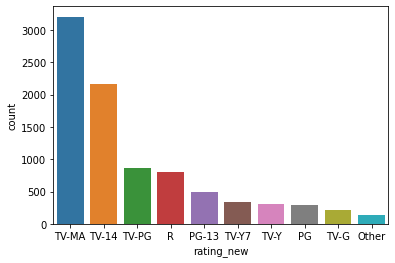

In [90]:
sns.countplot(x=df['rating_new'], order=df.rating_new.value_counts().index)

In [385]:
df.country.value_counts()

United States                                                                                                                  2818
India                                                                                                                           972
United Kingdom                                                                                                                  419
Japan                                                                                                                           245
South Korea                                                                                                                     199
Canada                                                                                                                          181
Spain                                                                                                                           145
France                                                                      

In [395]:
fq = df['country'].value_counts(normalize=True)
mapping = df['country'].map(fq)
df["country_new"] = df['country'].mask(mapping < 0.0025, "Partner Countries")

In [396]:
df["country_new"].value_counts()

United States                    2818
Partner Countries                1309
India                             972
United Kingdom                    419
Japan                             245
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
United Kingdom, United States      75
Philippines                        75
United States, Canada              73
Germany                            67
China                              66
Thailand                           61
Argentina                          56
Hong Kong                          53
United States, United Kingdom      47
Canada, Unit

<AxesSubplot:xlabel='country_new', ylabel='count'>

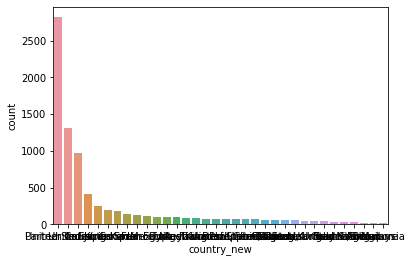

In [397]:
sns.countplot(x=df.country_new, order=df.country_new.value_counts().index)

In [398]:
df.country_new.isnull().sum()

831

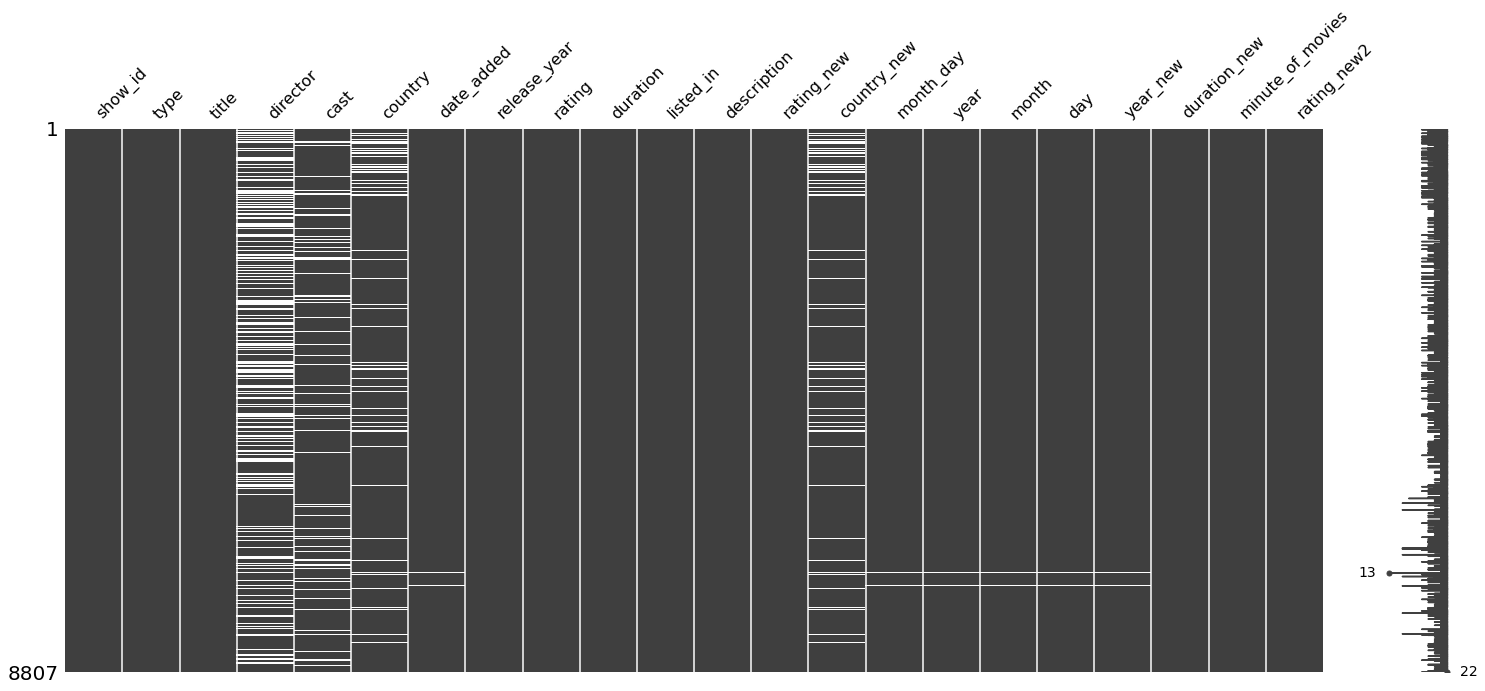

In [399]:
msn.matrix(df);

<AxesSubplot:>

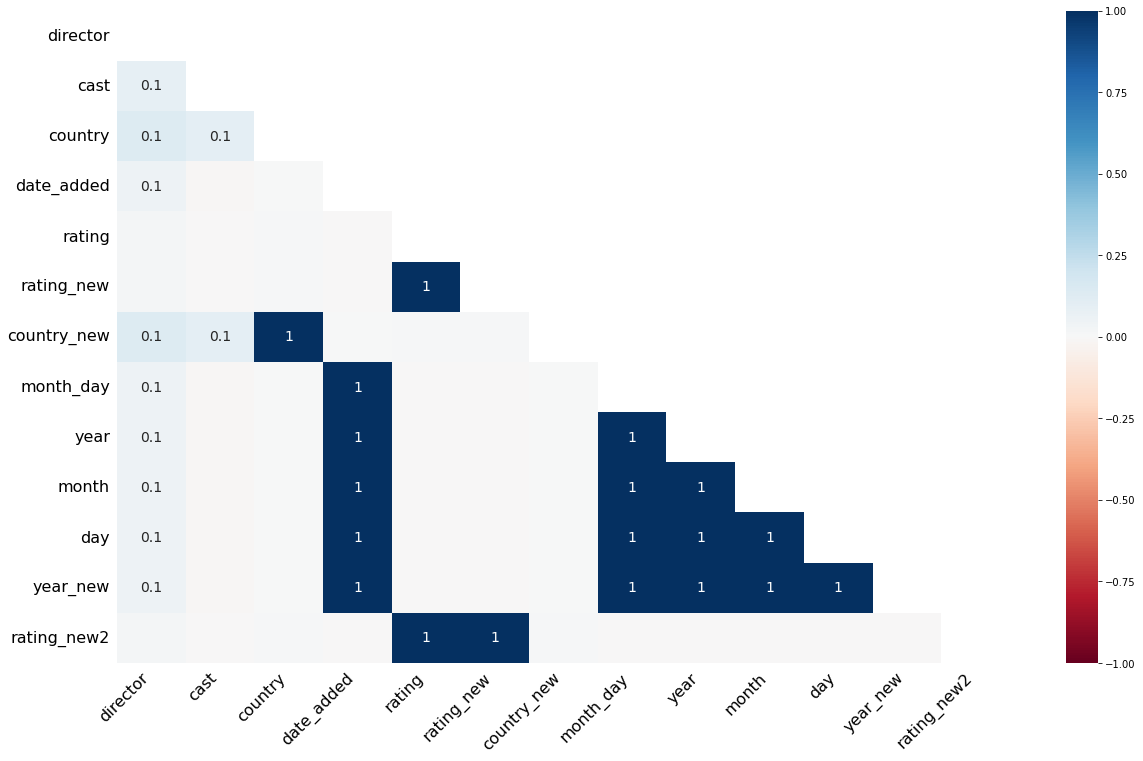

In [400]:
msn.heatmap(df)

#country ile director arasında bir ilişki yok

In [401]:
df[["director", "country_new"]]

,director,country_new
0,Kirsten Johnson,United States
1,NaN,South Africa
2,Julien Leclercq,NaN
3,NaN,NaN
4,NaN,India
...,...,...
8802,David Fincher,United States
8803,NaN,NaN
8804,Ruben Fleischer,United States
8805,Peter Hewitt,United States


In [412]:
df[~df["director"].isnull()][["country_new"]].isnull().sum()

country_new    422
dtype: int64

In [411]:
df[~df["director"].isnull()][["director", "country_new"]]

,director,country_new
0,Kirsten Johnson,United States
2,Julien Leclercq,NaN
5,Mike Flanagan,NaN
6,"Robert Cullen, José Luis Ucha",NaN
7,Haile Gerima,Partner Countries
...,...,...
8801,Majid Al Ansari,Partner Countries
8802,David Fincher,United States
8804,Ruben Fleischer,United States
8805,Peter Hewitt,United States


In [136]:
df['date_added'].value_counts()
#netflixe eklenme tarihi

#df["date"] = pd.to_datetime(df["date_added"]) 

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

In [250]:
df[["month_day", "year"]] = df['date_added'].str.split(",", expand=True, n=2)
#expand = True yapınca ikiye bölüyo oraki stringi 2'den fazla olacak şekilde de ayarlayabilirsin (n=4 gibi)

In [251]:
df["month_day"] = df["month_day"].str.strip()

In [252]:
df[["month", "day"]] = df['month_day'].str.split(" ", expand=True)

In [163]:
df.year.value_counts()

 2019    2016
 2020    1879
 2018    1649
 2021    1498
 2017    1188
 2016     429
 2015      82
 2014      24
 2011      13
 2013      11
 2012       3
 2009       2
 2008       2
 2010       1
Name: year, dtype: int64

In [254]:
fq = df['year'].value_counts(normalize=True)
mapping = df['year'].map(fq)
df["year_new"] = df['year'].mask(mapping < 0.01, "Other")

<AxesSubplot:xlabel='year_new', ylabel='count'>

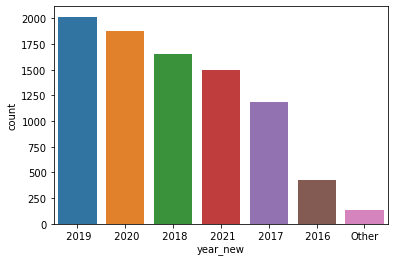

In [255]:
sns.countplot(x=df["year_new"], data=df, order=df["year_new"].value_counts().index)

In [167]:
df.month.value_counts()

July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: month, dtype: int64

In [170]:
df.day.value_counts()

1     2212
15     687
2      325
16     289
31     274
20     249
19     243
5      231
22     230
10     214
30     210
6      210
18     207
26     206
8      201
14     198
25     197
27     195
7      194
21     193
28     190
23     184
12     181
17     180
4      175
13     175
24     159
3      151
11     149
9      147
29     141
Name: day, dtype: int64

In [171]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type_num', 'rating_new', 'country_new', 'date', 'date_added_new',
       'month_day', 'year', 'month', 'day', 'year_new'],
      dtype='object')

In [172]:
df.release_year.value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [179]:
df.duration.value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [256]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_new,country_new,month_day,year,month,day,year_new
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",Other,United States,April 4,2017,April,4,2017
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,Other,United States,September 16,2016,September,16,2016
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,Other,United States,August 15,2016,August,15,2016


In [261]:
df.loc[df.show_id == "s5542", "duration"] = "74 min"

In [263]:
df.loc[df.show_id == "s5795", "duration"] = "84 min"

In [264]:
df.loc[df.show_id == "s5814", "duration"] = "66 min"

In [266]:
df.duration.isnull().any()

False

In [303]:
df.duration.value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
90 min         152
94 min         146
97 min         146
93 min         146
91 min         144
95 min         137
96 min         130
92 min         129
102 min        122
98 min         120
99 min         118
101 min        116
88 min         116
103 min        114
106 min        111
100 min        108
89 min         106
104 min        104
86 min         103
105 min        101
87 min         101
107 min         98
110 min         97
4 Seasons       95
108 min         87
116 min         80
112 min         74
85 min          73
113 min         69
109 min         69
111 min         68
84 min          68
118 min         65
83 min          65
5 Seasons       65
119 min         63
81 min          62
115 min         61
117 min         61
120 min         56
114 min         56
121 min         54
82 min          52
124 min         52
127 min         48
122 min         45
78 min          45
123 min         44
126 min         44
80 min      

In [277]:
df.loc[df.duration.str.contains("Season"), "duration_new"] = 1
df.loc[df.duration.str.contains("min"), "duration_new"] = 0

In [280]:
df.duration_new.isnull().any()

False

In [283]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_new,country_new,month_day,year,month,day,year_new,duration_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",PG-13,United States,September 25,2021,September,25,2021,0.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV-MA,South Africa,September 24,2021,September,24,2021,1.0


0.0    6131
1.0    2676
Name: duration_new, dtype: int64
Movie      6131
TV Show    2676
Name: type, dtype: int64


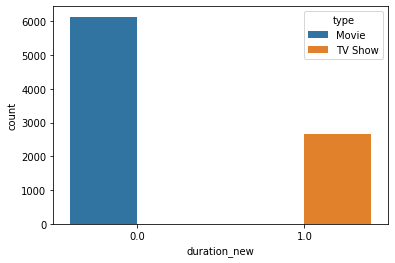

In [304]:
sns.countplot(data=df, x="duration_new", hue="type")
#Seasons = 1
#min olanlar = 0

print(df.duration_new.value_counts())
print(df.type.value_counts())

#demekki Movie olanlar min olarak geçenler
#tv shows olanlar season

In [318]:
df[["minute_of_movies", "irrevelant"]] = df[df.type=="Movie"].duration.str.split(" ", expand=True)

In [321]:
df = df.drop(["irrevelant"], axis=1)

In [328]:
df.minute_of_movies = df.minute_of_movies.fillna(0)

In [366]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_new,country_new,month_day,year,month,day,year_new,duration_new,minute_of_movies
1067,s1068,TV Show,The Underclass,Pass Patthanakumjon,"Nannaphas Loetnamchoetsakun, Praewa Suthamphon...",Thailand,"April 14, 2021",2020,TV-MA,1 Season,"International TV Shows, TV Dramas, Teen TV Shows","After getting dropped from an elite program, a...",TV-MA,Thailand,April 14,2021,April,14,2021,1.0,100.0
3247,s3248,TV Show,Trolls: The Beat Goes On!,NaN,"Amanda Leighton, Skylar Astin, Ron Funches, Da...",United States,"November 22, 2019",2019,TV-Y7,8 Seasons,"Kids' TV, TV Comedies",As Queen Poppy welcomes a new time of peace in...,TV-Y7,United States,November 22,2019,November,22,2019,1.0,800.0
6065,s6066,Movie,A Wrinkle in Time,Ava DuVernay,"Storm Reid, Oprah Winfrey, Reese Witherspoon, ...",United States,"September 25, 2018",2018,PG,110 min,Children & Family Movies,"Years after their father disappears, Meg and h...",PG,United States,September 25,2018,September,25,2018,0.0,110.0
4793,s4794,Movie,Deewana Main Deewana,K.C. Bokadia,"Govinda, Priyanka Chopra, Kader Khan, Prem Cho...",India,"July 1, 2018",2013,TV-14,107 min,"Comedies, Dramas, International Movies",A man's instant attraction to a woman becomes ...,TV-14,India,July 1,2018,July,1,2018,0.0,107.0
6583,s6584,Movie,Death at a Funeral,Neil LaBute,"Chris Rock, Martin Lawrence, Tracy Morgan, Dan...",United States,"August 1, 2020",2010,R,93 min,Comedies,"When a Los Angeles family's patriarch dies, hi...",R,United States,August 1,2020,August,1,2020,0.0,93.0


In [346]:
df.minute_of_movies = df.minute_of_movies.astype("int")

In [351]:
df[df["minute_of_movies"] != 0]["minute_of_movies"].mean()

99.56499755341706

In [358]:
df[df["type"] == "TV Show"]["duration"].value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

In [365]:
df.loc[df["duration"] == "1 Season", "minute_of_movies"] = 100
df.loc[df["duration"] == "2 Seasons", "minute_of_movies"] = 200
df.loc[df["duration"] == "3 Seasons", "minute_of_movies"] = 300
df.loc[df["duration"] == "4 Seasons", "minute_of_movies"] = 400
df.loc[df["duration"] == "5 Seasons", "minute_of_movies"] = 500
df.loc[df["duration"] == "6 Seasons", "minute_of_movies"] = 600
df.loc[df["duration"] == "7 Seasons", "minute_of_movies"] = 700
df.loc[df["duration"] == "8 Seasons", "minute_of_movies"] = 800
df.loc[df["duration"] == "9 Seasons", "minute_of_movies"] = 900
df.loc[df["duration"] == "10 Seasons", "minute_of_movies"] = 1000
df.loc[df["duration"] == "13 Seasons", "minute_of_movies"] = 1300
df.loc[df["duration"] == "15 Seasons", "minute_of_movies"] = 1500
df.loc[df["duration"] == "12 Seasons", "minute_of_movies"] = 1200
df.loc[df["duration"] == "11 Seasons", "minute_of_movies"] = 1100
df.loc[df["duration"] == "17 Seasons", "minute_of_movies"] = 1700

<AxesSubplot:xlabel='type', ylabel='minute_of_movies'>

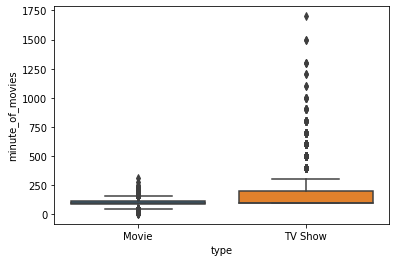

In [367]:
sns.boxplot(x="type", y="minute_of_movies", data=df)

In [369]:
df['rating_new'].value_counts()

#14 yaş üstü uygun TV-14
#7 yaş üstü uygun TV-PG
#13 yaş üstü uygun PG-13
#7 yaş üstü uygun TV-Y7
#tüm çocuklar için uygun TV-Y
#7 yaş üstü uygun PG
#tüm çocuklar için uygun TV-G

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
Other     136
Name: rating_new, dtype: int64

In [378]:
df.loc[(df["rating_new"] == "TV-MA") | (df["rating_new"] == "R"), "rating_new2"] = 0
df.loc[(df["rating_new"] == "TV-Y") | (df["rating_new"] == "TV-G"), "rating_new2"] = 1
df.loc[(df["rating_new"] == "TV-PG") | (df["rating_new"] == "TV-Y7") | (df["rating_new"] == "PG"), "rating_new2"] = 2
df.loc[(df["rating_new"] == "PG-13"), "rating_new2"] = 3
df.loc[(df["rating_new"] == "TV-14"), "rating_new2"] = 4
df.loc[(df["rating_new"] == "Other"), "rating_new2"] = 5

In [379]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_new,country_new,month_day,year,month,day,year_new,duration_new,minute_of_movies,rating_new2
5305,s5306,TV Show,Narcos,NaN,"Wagner Moura, Pedro Pascal, Boyd Holbrook, Dam...","United States, Colombia, Mexico","September 1, 2017",2017,TV-MA,3 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas",The true story of Colombia's infamously violen...,TV-MA,Other,September 1,2017,September,1,2017,1.0,300.0,0.0
728,s729,Movie,The Devil Below,Bradley Parker,"Alicia Sanz, Will Patton, Jonathan Sadowski, A...",United States,"June 13, 2021",2021,TV-MA,89 min,Horror Movies,When a team of researchers tries to find out w...,TV-MA,United States,June 13,2021,June,13,2021,0.0,89.0,0.0
8551,s8552,TV Show,The War: A Film by Ken Burns and Lynn Novick,NaN,Keith David,United States,"February 22, 2017",2007,TV-14,1 Season,Docuseries,A seven-part series brings World War II to lif...,TV-14,United States,February 22,2017,February,22,2017,1.0,100.0,4.0
6836,s6837,TV Show,Gentlemen and Gangsters,NaN,"David Dencik, Ruth Vega Fernandez, David Fukam...",Sweden,"June 1, 2016",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Romant...","Now on the run, a writer relates his previous ...",TV-MA,Other,June 1,2016,June,1,2016,1.0,100.0,0.0
3792,s3793,TV Show,When They See Us,NaN,"Asante Blackk, Caleel Harris, Ethan Herisse, J...",United States,"May 31, 2019",2019,TV-MA,1 Season,"Crime TV Shows, TV Dramas",Five teens from Harlem become trapped in a nig...,TV-MA,United States,May 31,2019,May,31,2019,1.0,100.0,0.0


In [418]:
df.listed_in.value_counts()

Dramas, International Movies                                                       362
Documentaries                                                                      359
Stand-Up Comedy                                                                    334
Comedies, Dramas, International Movies                                             274
Dramas, Independent Movies, International Movies                                   252
Kids' TV                                                                           220
Children & Family Movies                                                           215
Children & Family Movies, Comedies                                                 201
Documentaries, International Movies                                                186
Dramas, International Movies, Romantic Movies                                      180
Comedies, International Movies                                                     176
Comedies, International Movies, Romantic Mo

In [413]:
df.to_csv("netflix_movie_tvshow.csv")